In [1]:
import matplotlib

import os
import sqlite3
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.rcParams['legend.markerscale'] = 3
matplotlib.rcParams['font.size'] = 16.0

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
DIR = os.getcwd() + "/../data/"
df = pd.read_csv(DIR + 'raw/loan.csv')
df.head()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


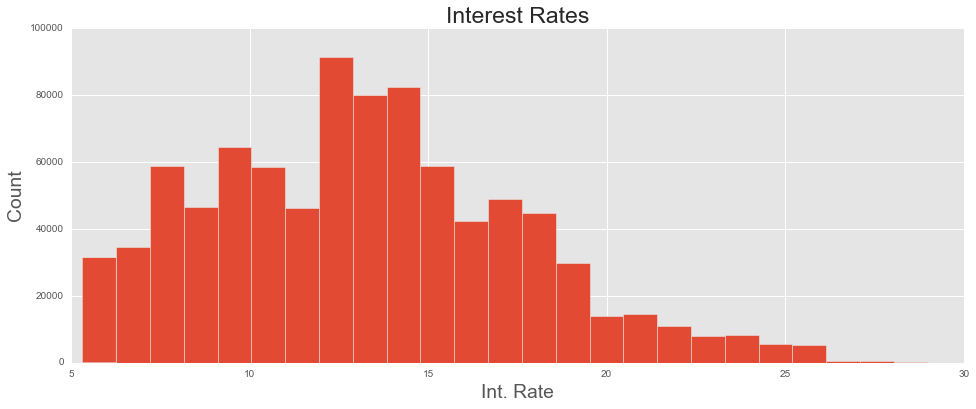

In [3]:
ax = df['int_rate'].hist(bins=25)
ax.set_xlabel('Int. Rate')
ax.set_ylabel('Count')
ax.set_title('Interest Rates')
plt.show()

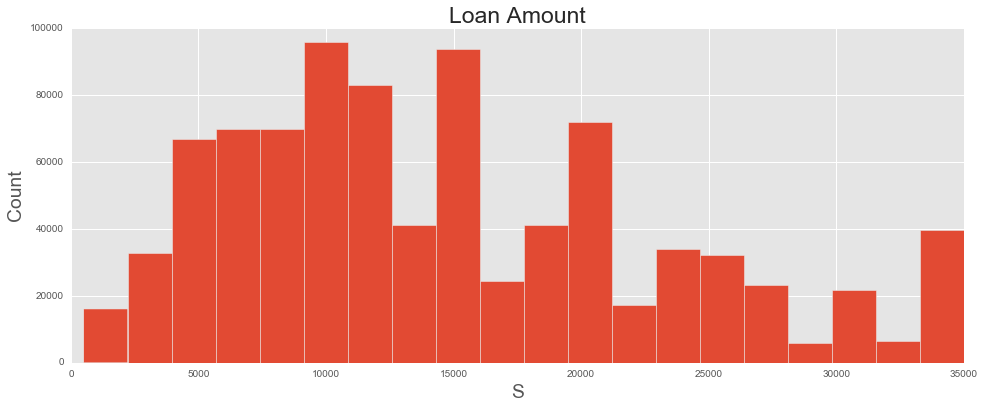

In [4]:
ax = df['loan_amnt'].hist(bins=20)
ax.set_xlabel('S')
ax.set_ylabel('Count')
ax.set_title('Loan Amount')
plt.show()

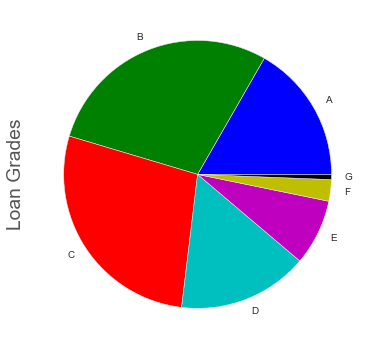

In [5]:
ax = df[['grade','id']].groupby('grade').count()['id'].plot.pie(figsize=(6, 6))
ax.set_ylabel('Loan Grades')
plt.show()

In [6]:
print 'Number of rows: ',len(df)
print 'Number of rows with at least 1 NA value: ', len(df.dropna())

Number of rows:  887379
Number of rows with at least 1 NA value:  0


In [7]:
c = df.corr().abs()
print 'Most uncorrelated Variables'
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort", ascending=True)).reset_index().dropna()
so.drop_duplicates(subset=[0]).head(10)

Most uncorrelated Variables


,level_0,level_1,0
0,open_rv_12m,total_cu_tl,0.000015
2,total_rev_hi_lim,recoveries,0.000103
4,open_acc,tot_coll_amt,0.000124
6,funded_amnt,delinq_2yrs,0.000151
8,delinq_2yrs,loan_amnt,0.000159
10,installment,open_il_12m,0.000167
12,delinq_2yrs,tot_coll_amt,0.000207
14,acc_now_delinq,tot_coll_amt,0.000237
16,collections_12_mths_ex_med,dti,0.000292
18,pub_rec,acc_now_delinq,0.000349


In [8]:
df.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'next_pymnt_d',
       u'last_credit_pull_d', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'policy_code', u'application_type',
       u'annu

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


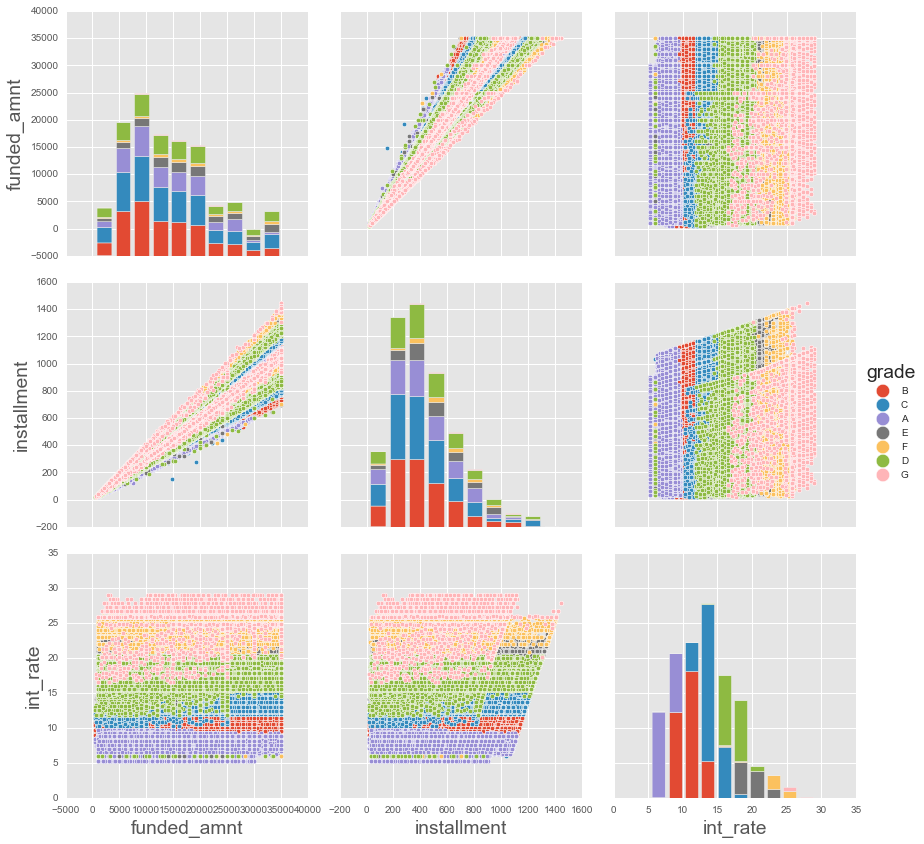

In [9]:
ax = sns.pairplot(df[['grade','funded_amnt', 'installment', 'int_rate']], hue="grade", size=4)
matplotlib.rc("legend", fontsize=20)
plt.show()

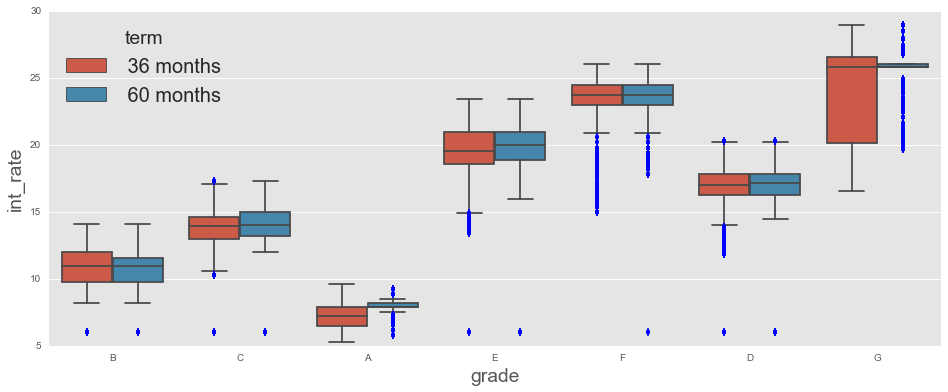

In [16]:
sns.boxplot(x="grade", y="int_rate", hue='term', data=df)
sns.despine(offset=0, trim=False)

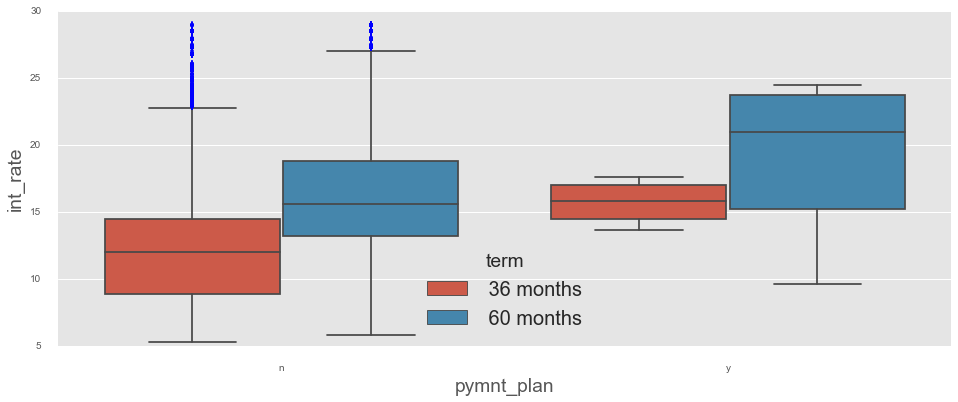

In [17]:
sns.boxplot(x="pymnt_plan", y="int_rate", hue='term', data=df)
sns.despine(offset=10, trim=True)

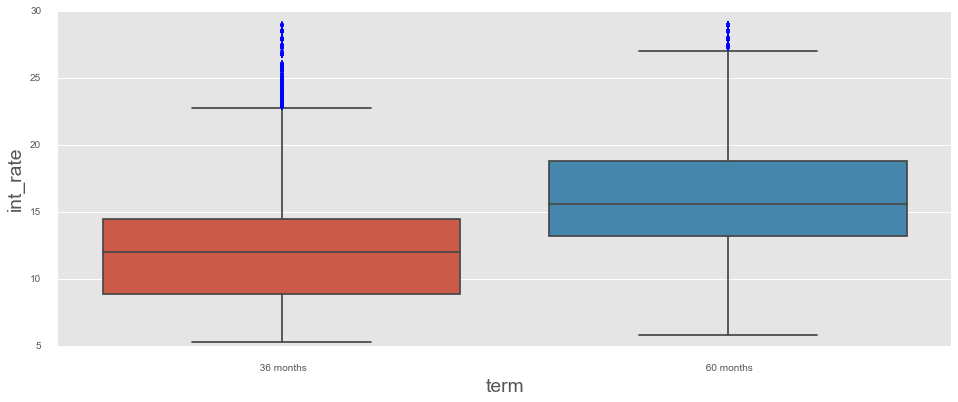

In [18]:
sns.boxplot(x="term", y="int_rate", data=df)
sns.despine(offset=10, trim=True)

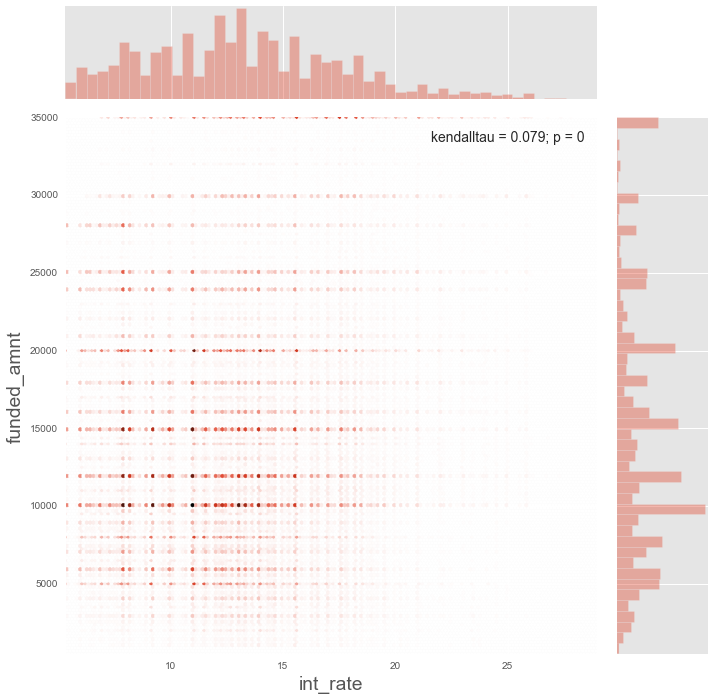

In [22]:
from scipy.stats import kendalltau
matplotlib.rc("legend", fontsize=14)
sns.jointplot(df['int_rate'], df['funded_amnt'], kind="hex", stat_func=kendalltau, size=10)